In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from utilities import visualize_classifier

In [4]:
data = np.loadtxt('data_imbalance.txt', delimiter=',')
X = data[:, :-1]
y = data[:,-1]

In [5]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

/var/folders/37/bthn4r2s655gkkynpkfcp7040000gn/T/ipykernel_51389/3587105921.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')


Text(0.5, 1.0, 'Input data')

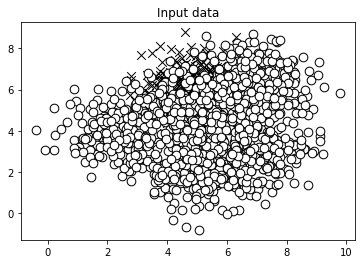

In [10]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

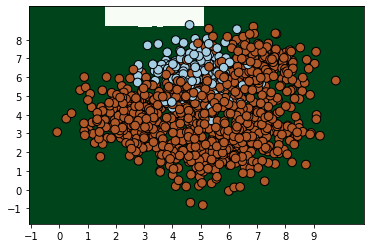

In [22]:
classifier = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train)

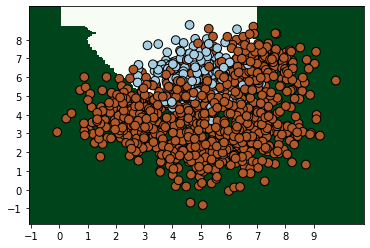

In [23]:
classifier = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0, class_weight='balanced')
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train)

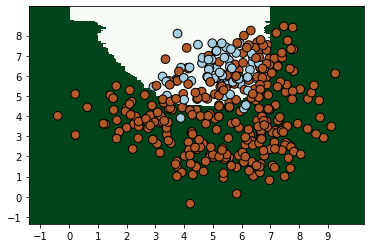

In [19]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test)

In [17]:
class_names = ['Class-0', 'Class-1']
print("Performa data latih\n")
print(classification_report(y_train, classifier.predict(X_train),
target_names=class_names))

Performa data latih

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125



In [20]:
print("Performa data uji\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Performa data uji

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

